In [1]:
import os
import pandas as pd

In [2]:
os.chdir(r'C:\Users\pc\Documents\kaggle\final')

In [3]:
train= pd.read_csv("lspoons_train.csv")
test = pd.read_csv("lspoons_test.csv")
store = pd.read_csv("store.csv")

In [4]:
train

,id,Store,Date,Sales,Promo,StateHoliday,SchoolHoliday
0,14929,85,2015-05-01,11360,1,a,0
1,14930,512,2015-05-01,10534,1,a,0
2,14931,1097,2015-05-01,17039,1,a,0
3,14932,1,2015-04-30,6228,1,0,0
4,14933,9,2015-04-30,9717,1,0,0
...,...,...,...,...,...,...,...
62239,77168,1106,2014-08-01,5284,1,0,1
62240,77169,1108,2014-08-01,6249,1,0,1
62241,77170,1111,2014-08-01,5199,1,0,1
62242,77171,1112,2014-08-01,10058,1,0,1


In [5]:
train['SchoolHoliday'].value_counts()

0    49567
1    12677
Name: SchoolHoliday, dtype: int64

# 1.StateHoliday 변수 변환

In [6]:
train = pd.get_dummies(columns = ['StateHoliday'], data=train)
test = pd.get_dummies(columns = ['StateHoliday'], data=test)

In [7]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,14929,85,2015-05-01,11360,1,0,0,1,0,0
1,14930,512,2015-05-01,10534,1,0,0,1,0,0
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0
3,14932,1,2015-04-30,6228,1,0,1,0,0,0
4,14933,9,2015-04-30,9717,1,0,1,0,0,0


In [8]:
test.head()  ##test 데이터에서 SH b,c가 없구나

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,0,1,2015-07-01,1,0,1,0
1,1,9,2015-07-01,1,1,1,0
2,2,11,2015-07-01,1,0,1,0
3,3,12,2015-07-01,1,0,1,0
4,4,14,2015-07-01,1,1,1,0


In [9]:
test['StateHoliday_b']=0
test['StateHoliday_c']=0

In [10]:
test.head() ##컬럼 통일

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,0,1,2015-07-01,1,0,1,0,0,0
1,1,9,2015-07-01,1,1,1,0,0,0
2,2,11,2015-07-01,1,0,1,0,0,0
3,3,12,2015-07-01,1,0,1,0,0,0
4,4,14,2015-07-01,1,1,1,0,0,0


# Date 변수를 활용한 FE

In [11]:
train['Date'].dtypes  ## 그냥 스트링이구나 datetime형태로 바꿔줘야겠다

dtype('O')

In [12]:
train['Date']=pd.to_datetime(train['Date'])  ## <M8[ns] 이게 데이트타임형식
test['Date']=pd.to_datetime(test['Date']) 

In [13]:
train['weekday'] = train['Date'].dt.weekday
test['weekday'] = test['Date'].dt.weekday

In [14]:
train['year'] = train['Date'].dt.year
test['year'] = test['Date'].dt.year

In [15]:
train['month'] = train['Date'].dt.month
test['month'] = test['Date'].dt.month

In [16]:
##이렇게 변환하면 굉장히 쉽게 값을 가져올 수 있다.
train['Date'].dt.month

0        5
1        5
2        5
3        4
4        4
        ..
62239    8
62240    8
62241    8
62242    8
62243    8
Name: Date, Length: 62244, dtype: int64

# 베이스라인 모델링

In [17]:
from xgboost import XGBRegressor

In [18]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=2021)

In [19]:
train.columns

Index(['id', 'Store', 'Date', 'Sales', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'weekday', 'year', 'month'],
      dtype='object')

In [20]:
input_var =['Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'weekday', 'year', 'month']

In [21]:
xgb.fit(train[input_var],train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=2021, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [22]:
test['Sales']=xgb.predict(test[input_var])

In [23]:
test[['id','Sales']].to_csv("submission.csv",index=False)

# 변수선택

In [27]:
input_var

['Promo',
 'SchoolHoliday',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'weekday',
 'year',
 'month']

In [25]:
xgb.feature_importances_

array([7.0119292e-01, 5.6813221e-02, 8.5970303e-03, 3.9727520e-03,
       1.7045721e-03, 8.6084956e-06, 8.5364915e-02, 5.7804018e-02,
       8.4541962e-02], dtype=float32)

In [29]:
imp_df = pd.DataFrame({"var": input_var,
                      "imp": xgb.feature_importances_})

In [33]:
imp_df = imp_df.sort_values(['imp'], ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

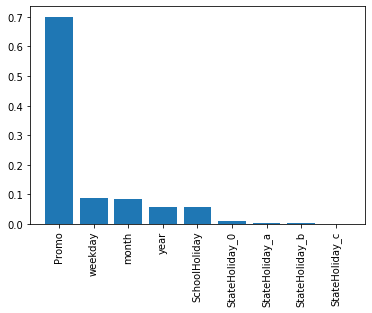

In [35]:
import matplotlib.pyplot as plt
plt.bar(imp_df['var'], imp_df['imp'])
## x축 label 회전
plt.xticks(rotation=90)

In [36]:
## cross-validation
from sklearn.model_selection import cross_val_score

In [40]:
cross_val_score(xgb, train[input_var], train['Sales'], scoring = "neg_mean_squared_error", cv=3)

array([ -7442398.68110158, -10165475.69817356,  -7896996.52747543])

In [41]:
input_selected =['Promo','weekday','month','year','SchoolHoliday']

In [42]:
cross_val_score(xgb, train[input_selected], train['Sales'], scoring = "neg_mean_squared_error", cv=3)

array([ -7437417.60656606, -10109891.53781048,  -7579785.74399885])

# 상위 몇개의 데이터를 사용할때 베스트일까

In [43]:
import numpy as np

In [44]:
score_list =[]
selected_varnum = []

In [46]:
for i in range(1,10):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb, train[selected_var], 
                             train['Sales'], 
                             scoring = "neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

1
2
3
4
5
6
7
8
9


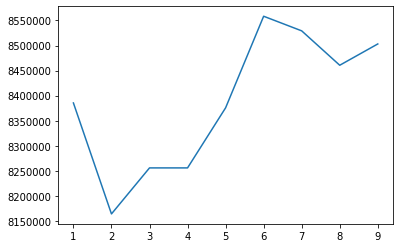

In [47]:
plt.plot(selected_varnum, score_list)

In [48]:
cross_val_score(xgb, train[['Promo','weekday']], train['Sales'], scoring = "neg_mean_squared_error", cv=3)

array([ -7241548.38898523, -10134534.97381444,  -7116067.92521244])

In [49]:
xgb.fit(train[['Promo','weekday']],train['Sales'])

test['Sales']=xgb.predict(test[['Promo','weekday']])

test[['id','Sales']].to_csv("submission_2.csv",index=False)

In [50]:
store ## 다른데이터 병합하여 활용해서 정확도를 올려보자

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [51]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,4,2015,5
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,4,2015,5
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,4,2015,5
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,3,2015,4
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,3,2015,4


In [53]:
train.loc[train['Store']==1]  ##상점이 같아도 날짜가 여럿이니 행이 엄청 많지

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,3,2015,4
303,15232,1,2015-04-29,5775,1,0,1,0,0,0,2,2015,4
603,15532,1,2015-04-28,5199,1,0,1,0,0,0,1,2015,4
903,15832,1,2015-04-27,5575,1,0,1,0,0,0,0,2015,4
1213,16142,1,2015-04-25,4318,0,0,1,0,0,0,5,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,75904,1,2014-08-06,5337,1,1,1,0,0,0,2,2014,8
61227,76156,1,2014-08-05,5433,1,1,1,0,0,0,1,2014,8
61479,76408,1,2014-08-04,5655,1,1,1,0,0,0,0,2014,8
61740,76669,1,2014-08-02,4731,0,1,1,0,0,0,5,2014,8


In [55]:
store.loc[store['Store']==1] 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [56]:
store.loc[store['Store']==9] 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [57]:
## 이런 상점의 데이터를 merge해보자 컬럼에다가   on = 컬럼기준
train=pd.merge(train,store, on = 'Store', how = 'left')
test=pd.merge(test,store, on = 'Store', how = 'left')

In [58]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,...,month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,...,5,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,...,5,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,...,5,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,...,4,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,...,4,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [64]:
train['CompetitionOpen'] =12*(train['year'] - train['CompetitionOpenSinceYear']) + \
                            (train['month'] - train['CompetitionOpenSinceMonth'])
test['CompetitionOpen'] =12*(test['year'] - test['CompetitionOpenSinceYear']) + \
                            (test['month'] - test['CompetitionOpenSinceMonth'])

In [65]:
train['WeekOfYear'] = train['Date'].dt.weekofyear
test['WeekOfYear'] = test['Date'].dt.weekofyear

In [66]:
train['PromoOpen'] = 12*(train['year'] - train['Promo2SinceWeek']) + \
                            (train['WeekOfYear'] - train['Promo2SinceWeek'])/4
test['PromoOpen'] = 12*(test['year'] - test['Promo2SinceWeek']) + \
                            (test['WeekOfYear'] - test['Promo2SinceWeek'])/4

In [67]:
train.dtypes

id                                    int64
Store                                 int64
Date                         datetime64[ns]
Sales                                 int64
Promo                                 int64
SchoolHoliday                         int64
StateHoliday_0                        uint8
StateHoliday_a                        uint8
StateHoliday_b                        uint8
StateHoliday_c                        uint8
weekday                               int64
year                                  int64
month                                 int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
CompetitionOpen                 

In [68]:
### One Hot해줘야겠지
train = pd.get_dummies(columns=['StoreType'], data = train)
test = pd.get_dummies(columns=['StoreType'], data = test)
train = pd.get_dummies(columns=['Assortment'], data = train)
test = pd.get_dummies(columns=['Assortment'], data = test)

In [69]:
train = pd.get_dummies(columns=['PromoInterval'], data = train)
test = pd.get_dummies(columns=['PromoInterval'], data = test)

In [70]:
train.columns

Index(['id', 'Store', 'Date', 'Sales', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'weekday', 'year', 'month', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpen', 'WeekOfYear',
       'PromoOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [71]:
test.columns

Index(['id', 'Store', 'Date', 'Promo', 'SchoolHoliday', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'weekday', 'year',
       'month', 'Sales', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'CompetitionOpen', 'WeekOfYear', 'PromoOpen',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [72]:
train.columns

Index(['id', 'Store', 'Date', 'Sales', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'weekday', 'year', 'month', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpen', 'WeekOfYear',
       'PromoOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [84]:
input_var = ['Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'weekday', 'year', 'month', 'CompetitionDistance',
       'Promo2',
       'CompetitionOpen', 'WeekOfYear',
       'PromoOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec']

In [85]:
xgb = XGBRegressor(n_estimators=300,learning_rate=0.1, random_state=2021)

In [86]:
xgb.fit(train[input_var],train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=2021, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [87]:
imp_df = pd.DataFrame({'var':input_var,
                      'imp':xgb.feature_importances_})

In [88]:
imp_df = imp_df.sort_values(['imp'],ascending=False)

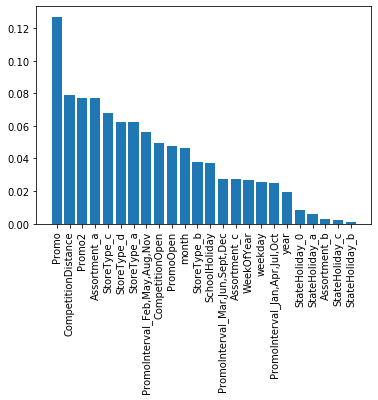

In [92]:
plt.bar(imp_df['var'],imp_df['imp'])
plt.xticks(rotation=90)
plt.show()

In [93]:
score_list = []
selected_varnum=[]

In [94]:
for i in range(1,25):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb, train[selected_var], 
                             train['Sales'], 
                             scoring = "neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


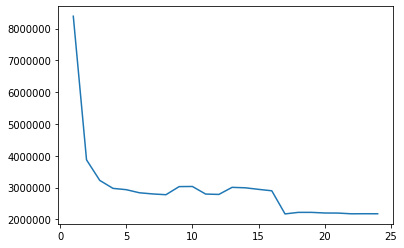

In [95]:
plt.plot(selected_varnum, score_list)

In [96]:
input_var = imp_df['var'].iloc[:17].tolist()

In [97]:
cross_val_score(xgb, train[input_var], train['Sales'], scoring = "neg_mean_squared_error", cv=3)

array([-1880369.08076616, -3010176.86238671, -1619802.48980788])

In [102]:
xgb.fit(train[input_var],train['Sales'])

test['Sales']=xgb.predict(test[input_var])

test[['id','Sales']].to_csv("submission_3.csv",index=False)

# parameter 튜닝

In [114]:
import numpy as np
a = np.array([1,2,3,4,5,6,7,8,9])*100

In [115]:
estim_list =a.tolist()

In [117]:
score_list = []

In [118]:
for i in estim_list:
    xgb = XGBRegressor(n_estimators=i,learning_rate=0.1, random_state=2021)
    scores = cross_val_score(xgb, train[input_var], train['Sales'], scoring = "neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    print(i)

100
200
300
400
500
600
700
800
900


(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 11 Text xticklabel objects>)

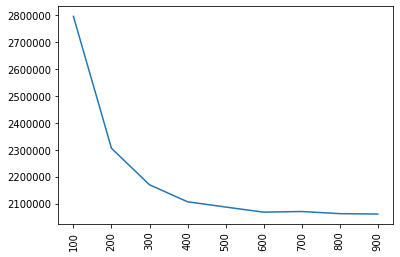

In [119]:
plt.plot(estim_list,score_list)
plt.xticks(rotation=90)

In [120]:
xgb = XGBRegressor(n_estimators=600,learning_rate=0.1, random_state=2021)

In [125]:
xgb.fit(train[input_var],train['Sales'])

test['Sales']=xgb.predict(test[input_var])

test[['id','Sales']].to_csv("submission_3.csv",index=False)

In [123]:

a = np.array([6,7,8,10])/100

lr_list =a.tolist()

score_list = []

for i in lr_list:
    xgb = XGBRegressor(n_estimators=600,learning_rate=i, random_state=2021)
    scores = cross_val_score(xgb, train[input_var], train['Sales'], scoring = "neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    print(i)

0.06
0.07
0.08
0.1


(array([0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095,
        0.1  , 0.105]),
 <a list of 11 Text xticklabel objects>)

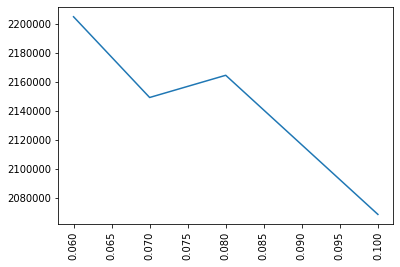

In [124]:
plt.plot(lr_list,score_list)
plt.xticks(rotation=90)

In [ ]:
##근데 이게 cross에서는 성적이 더 좋아지지만
## 실제 test 샘플에 맞춰볼때는 더 안좋을 수 있다. 오버피팅??